# LOS (Supermarket Sales)

# Data Science and Machine Learning

# Project 2020

In [13]:
#Here it begins

In [14]:
print ("This is LOS entry point")

This is LOS entry point


In [15]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib as plt
%matplotlib inline

import datetime as dt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
from sklearn.externals import joblib
from sklearn import datasets

In [16]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("../Datasets/supermarket-sales/supermarket_sales - Sheet1.csv")

In [17]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
#Get summary of numerical variables
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [19]:
#Get summary of non numerical variables
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [20]:
#the number of missing values in each column
df.apply(lambda x: sum(x.isnull()),axis=0) 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [21]:
#number of rows and column in the dataset
df.shape

(1000, 17)

In [22]:
df.ndim

2

In [23]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [24]:
#subsetting the dataset
series = df[["Date","Quantity"]]

In [25]:
series.head(3)

,Date,Quantity
0,1/5/2019,7
1,3/8/2019,5
2,3/3/2019,7


In [26]:
#convert to another datatype
series.loc.Quantity = series.Quantity.astype(str)
# series.loc.Date = series.Date.astype.date()
series.dtypes
series.head(3)

,Date,Quantity
0,1/5/2019,7
1,3/8/2019,5
2,3/3/2019,7


In [27]:
#Get rows that begins with 12
series[series['Date'].str.match('3')].head(3)

,Date,Quantity
1,3/8/2019,5
2,3/3/2019,7
5,3/25/2019,7


In [28]:
#Converting date to format day-month-year
# .apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y'))
series.Date = pd.to_datetime(series['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
series.head(3)

,Date,Quantity
0,2019-01-05,7
1,2019-03-08,5
2,2019-03-03,7


In [30]:
# sorting usind the date
series_sorted = series.sort_values(by=['Date'], ascending=True)

In [31]:
series_sorted.tail(3)

,Date,Quantity
963,2019-03-30,3
937,2019-03-30,5
474,2019-03-30,5


In [32]:
# series_summary = series_sorted.groupby('Date')['Quantity'].sum()
series_summary = series_sorted.groupby('Date')['Quantity'].sum().reset_index()
# series_summary.columns = ['Date','Total_Quantity']
# series_summary.rename(columns={'Date','Total_Quantity'},inplace=True)
# series_summary.rename(columns={"Quantity": "a", "": "c"})
series_summary.tail(3)

,Date,Quantity
86,2019-03-28,48
87,2019-03-29,54
88,2019-03-30,67


# Model one (1)

In [33]:
# series_summary.plot()
# pyplot.show()

In [34]:
# Create lagged dataset
# values = pd.DataFrame(series_summary.values)
values = pd.DataFrame(series_summary.Quantity)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1  t+1
0   NaN   81
1  81.0   48
2  48.0   37
3  37.0   32
4  32.0   55


In [35]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [36]:
# persistence model
def model_persistence(x):
    return x

In [37]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 902.903


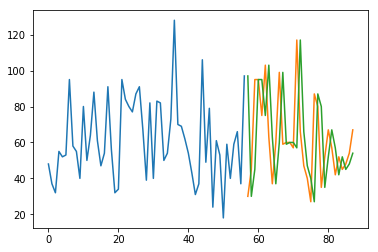

In [38]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

# Model Two (2)

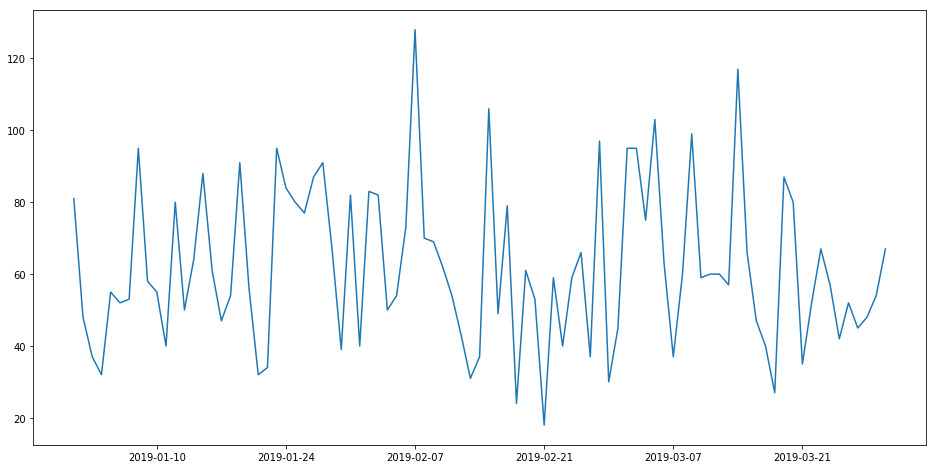

In [39]:
#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
series_summary.index = series_summary['Date']

#plot
pyplot.figure(figsize=(16,8))
pyplot.plot(series_summary['Quantity'], label='Total Quantity history')

In [40]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [41]:
#creating dataframe
data = series_summary.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(series_summary)),columns=['Date', 'Quantity'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Quantity'][i] = data['Quantity'][i]

In [42]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [43]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:80,:]
valid = dataset[80:,:]
# new_data

In [44]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 3s - loss: 0.1120


In [46]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

# Results

In [47]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

13.083575664218603

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


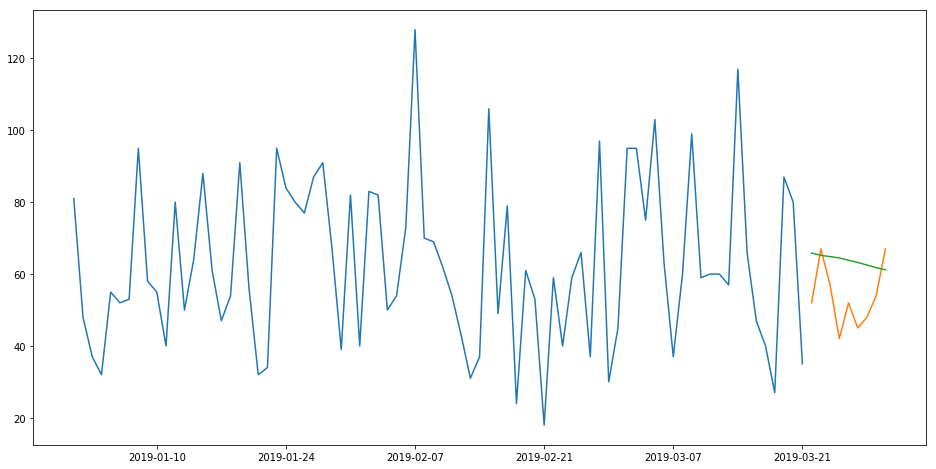

In [48]:
#for plotting
train = new_data[:80]
valid = new_data[80:]
valid['Predictions'] = closing_price
pyplot.figure(figsize=(16,8))
pyplot.plot(train['Quantity'])
pyplot.plot(valid[['Quantity','Predictions']])
#plot
# pyplot.figure(figsize=(16,8))
# pyplot.plot(series_summary['Quantity'], label='Total Quantity history')

In [49]:
actual = pd.DataFrame(new_data['Quantity'].tail(9))
predicted = pd.DataFrame(valid['Predictions'])
compare = actual.join(predicted)
compare

,Quantity,Predictions
Date,,
2019-03-22,52,65.860229
2019-03-23,67,65.233307
2019-03-24,57,64.860153
2019-03-25,42,64.488678
2019-03-26,52,63.852455
2019-03-27,45,63.234913
2019-03-28,48,62.511448
2019-03-29,54,61.790531
2019-03-30,67,61.203232


In [54]:
# pickle.dump(model, 'model.pkl', 'wb')
pickle.dump(model, open('model.pkl', 'wb'))
# joblib.dump(model, 'model.pkl')

In [51]:
loaded_model = joblib.load('model.pkl')

In [52]:
loaded_model

In [53]:
# closing_price = loaded_model.predict(X_test)
# closing_price = scaler.inverse_transform(closing_price)
# rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
# rms